In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Gather

In [2]:
#Read the twitter archive into tweets_df
tweets_df=pd.read_csv('twitter-archive-enhanced.csv')
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
tweets_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [244]:
#upload image-predictions.tsv using Request to the current directory
dirpath = os.getcwd()
image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'           
response=requests.get(image_pred_url)
with open (os.path.join(dirpath,image_pred_url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)


In [245]:
#load the predictions into image_pred_df , we need to specify the sepaerator to be a tab instead of the default comma
image_pred_df=pd.read_csv('image-predictions.tsv',sep='\t')
image_pred_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
#Tried to use the API but I was rejected, used the provided code instead with the already downloaded data because the code always fail
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

In [248]:
#read tweets json file line by line then append it to a list
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [249]:
tweets[0]['source']

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [250]:
#creat empty list of the coulmns that i'm intrested in
id_str,retweet_count,favorite_count = [],[],[]
#append each value to it's list
for tweet in tweets:
    id_str.append(tweet['id_str'])
    retweet_count.append(tweet['retweet_count'])
    favorite_count.append(tweet['favorite_count'])
    source.append(tweet['source'])
    created_at.append(tweet['created_at'])
#convert the lists to one dataframe
tweets_details = pd.DataFrame([id_str,retweet_count,favorite_count,source,created_at]).T
#rename the coulmns
tweets_details.rename(columns={0: 'id_str', 1: 'retweet_count', 2: 'favorite_count'}, inplace=True)
tweets_details.head()

,id_str,retweet_count,favorite_count,3,4
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r...",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r...",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jul 29 16:00:24 +0000 2017


## Assess

In [253]:
#assess tweets_df Visually 
tweets_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [251]:
#assess tweets_df programmatically
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [252]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tweets_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#check rating_numerator values
tweets_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#check the rows with zero rating_numerator value
tweets_df[tweets_df['rating_numerator']<=0]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
#check rating_denominator values
tweets_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
#check the zero values in rating_denominator
tweets_df[tweets_df['rating_denominator']<=0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
#check the name values
tweets_df.name.value_counts()


None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Buddy         7
Toby          7
Daisy         7
an            7
Stanley       6
Dave          6
Scout         6
Oscar         6
Jack          6
Rusty         6
Milo          6
Jax           6
Bella         6
Koda          6
Leo           6
Alfie         5
           ... 
Duddles       1
Sundance      1
Loomis        1
Carter        1
Tessa         1
Chadrick      1
Swagger       1
Vinscent      1
Marty         1
Mairi         1
Angel         1
Tug           1
Grizzie       1
Cuddles       1
Durg          1
Aldrick       1
Mary          1
Steve         1
Anthony       1
Fido          1
Fiji          1
Kirk          1
Molly         1
Thor          1
Tedders       1
Godzilla      1
Dwight        1
Ole           1
Peanut        1
Kramer        1
Name: name, Length: 957,

In [18]:
#check the names that start with lower case and it seems that that all values are not names 
tweets_df.loc[(tweets_df['name'].str.islower())].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
not              2
mad              2
actually         2
getting          2
officially       1
my               1
space            1
all              1
by               1
unacceptable     1
light            1
such             1
old              1
his              1
this             1
infuriating      1
life             1
incredibly       1
Name: name, dtype: int64

In [19]:
#check doggo values
tweets_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
#check floofer values
tweets_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
#check pupper values
tweets_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
#check puppo values
tweets_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
#check the retweets 
len(tweets_df[tweets_df['retweeted_status_id'].isnull()==False])

181

In [24]:
#check the source field values
tweets_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [254]:
# Assess image_pred_df Visually 
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [255]:
# Assess image_pred_df programatically
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [256]:
image_pred_df.tail()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [257]:
#asses tweets_details Visually
tweets_details

,id_str,retweet_count,favorite_count,3,4
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r...",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r...",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,"<a href=""http://twitter.com/download/iphone"" r...",Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,"<a href=""http://twitter.com/download/iphone"" r...",Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,"<a href=""http://twitter.com/download/iphone"" r...",Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,"<a href=""http://twitter.com/download/iphone"" r...",Wed Jul 26 15:59:51 +0000 2017


In [258]:
#asses tweets_details programatically
tweets_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 5 columns):
id_str            2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
3                 4708 non-null object
4                 4708 non-null object
dtypes: object(5)
memory usage: 184.0+ KB


In [259]:
tweets_details.head()

,id_str,retweet_count,favorite_count,3,4
0,892420643555336193,8853,39467,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,"<a href=""http://twitter.com/download/iphone"" r...",Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,"<a href=""http://twitter.com/download/iphone"" r...",Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,"<a href=""http://twitter.com/download/iphone"" r...",Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jul 29 16:00:24 +0000 2017


## Quality :
<ul>
<li>tweets_df table: 0 values in numerator and denominator</li>
<li>tweets_df table: missing values in name field</li>
<li>tweets_df table: wrong values in name field , any value that starts with lower case is not a name like the word 'the'</li>
<li>tweets_df table: there are retweets not tweets</li>
<li>Wrong data types in timestamp and tweet_id </li>
</ul>
<ul>
<li>image_pred_df table: under score in predctions coulmns p1 ,p2,p3</li>
<li>image_pred_df table: Missing records it has 2075 rows while tweets_df has 2356 rows</li>
</ul>
<ul>
<li>tweets_details table: wrong data types in retweet_count,favorite_count,source,created_at</li>
<li>tweets_details table: missing values it has 2354  rows while tweets_df has 2356 rows</li>
   <li>tweets_details table: Rename the id column in tweets detail to match the other dataframes </li>
</ul>


## Tidyness  :
<ul>
<li>tweets_df table: dog stages columns should be one column instead of 4</li>
<li>Ue one master dataframe instead of three</li>
<li>Remove the columns that we are not using</li>
<li>For predcetions, we will choose the highest predecion if and ony if that predection is dog instead of 3 columns

</ul>

In [270]:
#Clean copies of the three datasets
tweets_df_clean = tweets_df.copy()
image_pred_df_clean = image_pred_df.copy()
tweets_details_clean = tweets_details.copy()

### Define:
Missing values in name field in tweets_df_clean are showing as none and it should be null.Also names that starts with lower case letters are not really names and should be null.


### Code:

In [271]:
tweets_df_clean.loc[(tweets_df_clean['name'].str.islower()), 'name'] = ''
tweets_df_clean['name'] = tweets_df_clean['name'].replace('None', '')


### Test:

In [272]:
tweets_df_clean.loc[(tweets_df_clean['name'].str.islower())].name.value_counts()

Series([], Name: name, dtype: int64)

In [273]:
tweets_df_clean[tweets_df_clean['name']=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define:
Remove zero values in numerator and denominator in tweets_df_clean.I decided to remove those tweets .In tweet number 835152434251116546 the images are stolen.For Tweet 746906459439529985, there is no dog in the tweet.Tweet 835246439529840640 is  a reply not a tweet.

### Code:

In [274]:
tweets_df_clean=tweets_df_clean[tweets_df_clean['rating_numerator']!=0]
tweets_df_clean=tweets_df_clean[tweets_df_clean['rating_denominator']!=0]


### Test

In [275]:

tweets_df_clean[tweets_df_clean['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [276]:
tweets_df_clean[tweets_df_clean['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Drop Retweets.
### Code

In [277]:
tweets_df_clean=tweets_df_clean[tweets_df_clean['retweeted_status_id'].isnull()]

### Test

In [278]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2172 non-null int64
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2172 non-null object
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2172 non-null int64
rating_denominator            2172 non-null int64
name                          2172 non-null object
doggo                         2172 non-null object
floofer                       2172 non-null object
pupper                        2172 non-null object
puppo                         2172 non-null object
dtypes: float64(4), int64(3), object(1

### Define
Fix wrong data types in timestamp,tweet_id ,favorite_count and retweet_count
### Code

In [279]:
tweets_df_clean['timestamp'] = pd.to_datetime(tweets_df_clean['timestamp'])

In [280]:
tweets_df_clean['tweet_id']= tweets_df_clean['tweet_id'].astype(str)
image_pred_df_clean['tweet_id']= image_pred_df_clean['tweet_id'].astype(str)
tweets_details_clean["retweet_count"] = pd.to_numeric(tweets_details_clean["retweet_count"])
tweets_details_clean["favorite_count"] = pd.to_numeric(tweets_details_clean["favorite_count"])

### Test

In [282]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2172 non-null object
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2172 non-null datetime64[ns]
source                        2172 non-null object
text                          2172 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2172 non-null int64
rating_denominator            2172 non-null int64
name                          2172 non-null object
doggo                         2172 non-null object
floofer                       2172 non-null object
pupper                        2172 non-null object
puppo                         2172 non-null object
dtypes: datetime64[ns](1), fl

In [283]:
image_pred_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [284]:
tweets_details_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 5 columns):
id_str            2354 non-null object
retweet_count     2354 non-null float64
favorite_count    2354 non-null float64
3                 4708 non-null object
4                 4708 non-null object
dtypes: float64(2), object(3)
memory usage: 184.0+ KB


### Define
 Remove under score in predctions coulmns p1 ,p2,p3 in image_pred_df table
    
### Code

In [285]:
image_pred_df_clean['p1'] = image_pred_df_clean['p1'].str.replace('_', ' ').str.title()
image_pred_df_clean['p2'] = image_pred_df_clean['p2'].str.replace('_', ' ').str.title()
image_pred_df_clean['p3'] = image_pred_df_clean['p3'].str.replace('_', ' ').str.title()

### Test

In [286]:
image_pred_df_clean.loc[(image_pred_df_clean['p1'].str.islower())].p1.value_counts()

Series([], Name: p1, dtype: int64)

In [287]:
image_pred_df_clean.loc[(image_pred_df_clean['p2'].str.islower())].p2.value_counts()

Series([], Name: p2, dtype: int64)

In [288]:
image_pred_df_clean.loc[(image_pred_df_clean['p3'].str.islower())].p3.value_counts()

Series([], Name: p3, dtype: int64)

### Define
Rename the id column in tweets detail to match tth other dataframes and make the join easier.

### Code

In [292]:
tweets_details_clean.rename(columns={'id_str': 'tweet_id'}, inplace=True)

### Test

In [293]:
tweets_details_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 5 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null float64
favorite_count    2354 non-null float64
3                 4708 non-null object
4                 4708 non-null object
dtypes: float64(2), object(3)
memory usage: 184.0+ KB


### Define 
Missing records in image_pred_df_clean and in tweets_details_clean.This will be fixed when we merge the dataframes and choose only the vlaues that are found in all dataframes.I will do this later on tidyness.

## Tidyness :
### Define:
convert dog stages columns to one column instead of 4

### Code:


In [295]:

tweets_df_clean['dog_stage'] = tweets_df_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

tweets_df_clean['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
tweets_df_clean['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
tweets_df_clean['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
tweets_df_clean['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
tweets_df_clean['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

# For the cells that have more than one value ,
# doggoNonepupperNone a doggo could be a pupper and not the oppisite so I will make it pupper
# doggoNoneNonepuppo  we will make it doggo since puppo have mixed tendencies of doggo and pupper
# doggoflooferNoneNone we will make it floofer

tweets_df_clean['dog_stage'].replace("doggoNonepupperNone","pupper", inplace=True)
tweets_df_clean['dog_stage'].replace("doggoNoneNonepuppo","doggo", inplace=True)
tweets_df_clean['dog_stage'].replace("doggoflooferNoneNone","floofer", inplace=True)

### Test

In [296]:
tweets_df_clean['dog_stage'].value_counts()

None       1828
pupper      234
doggo        76
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Define:
For predcetions, we will choose the highest predecion if and ony if that predection is dog

### Code

In [290]:
#Function to the best predection if the predection is dog
def get_dog_breed_pred(row):   
    #set values
    breed_pred = 'Not dog'
    breed_conf = 0
    #To put each predction in row and compare to it
    predections = [(row[['p1', 'p1_dog', 'p1_conf']]), (row[['p2', 'p2_dog', 'p2_conf']]), (row[['p3', 'p3_dog', 'p3_conf']])]
    for predection in predections:
        # If the predection is dog
        if predection[1]:
            #if the confedence is the highest 
            if predection[2] >= breed_conf:
                #set predection and conf                                                                             
                breed_pred = predection[0]
                breed_conf = predection[2]
    
    # Update the row
    row['breed_pred'] = breed_pred
    row['breed_conf'] = breed_conf
    return row
                                                                                            
#create the new columns
image_pred_df_clean['breed_pred'] = ''
image_pred_df_clean['breed_conf'] = 0
#get the best predection if the predection is dog for each record                                                                                         
image_pred_df_clean = image_pred_df_clean.apply(get_dog_breed_pred, axis=1)

### Test

In [291]:
image_pred_df_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed_pred,breed_conf
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,Golden Retriever,0.943082,True,Labrador Retriever,0.032409,True,Kuvasz,0.005501,True,Golden Retriever,0.943082
161,668932921458302977,https://pbs.twimg.com/media/CUiG6_ZXAAAPaw_.jpg,1,Standard Poodle,0.237638,True,Old English Sheepdog,0.195573,True,Toy Poodle,0.144658,True,Standard Poodle,0.237638
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,Hamster,0.999484,False,Guinea Pig,0.000158,False,Broccoli,0.000061,False,Not dog,0.000000
468,675109292475830276,https://pbs.twimg.com/media/CV54UQTXAAAGf-j.jpg,1,Dalmatian,0.989519,True,English Setter,0.005258,True,German Short-Haired Pointer,0.001443,True,Dalmatian,0.989519
1831,836380477523124226,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,Wooden Spoon,0.082489,False,Sliding Door,0.061017,False,Grand Piano,0.055086,False,Not dog,0.000000
1495,783347506784731136,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True,Cardigan,0.611525
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,Labrador Retriever,0.772423,True,Beagle,0.055902,True,Golden Retriever,0.031152,True,Labrador Retriever,0.772423
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire Terrier,0.477704,True,Silky Terrier,0.171673,True,Australian Terrier,0.088334,True,Yorkshire Terrier,0.477704
695,684460069371654144,https://pbs.twimg.com/media/CX-wzZEUwAA4ISM.jpg,1,Labrador Retriever,0.673691,True,Chesapeake Bay Retriever,0.194897,True,American Staffordshire Terrier,0.059471,True,Labrador Retriever,0.673691
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan Hound,0.123529,True,Basset,0.119682,True,Siberian Husky,0.108709,True,Afghan Hound,0.123529


### Define
Drop the unwanted coulmns in all tables
### Code

In [299]:
tweets_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'text','retweeted_status_id','retweeted_status_user_id',
                     'retweeted_status_timestamp','expanded_urls','doggo','floofer','pupper','puppo'], axis=1,inplace =True)
image_pred_df_clean.drop(['jpg_url', 'img_num', 'p1_conf','p1','p1_dog','p2_conf','p2','p2_dog','p3_conf','p3','p3_dog'], axis=1,inplace =True)


### Test

In [300]:
print(tweets_df_clean.info())
print(image_pred_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2172 non-null object
timestamp             2172 non-null datetime64[ns]
source                2172 non-null object
rating_numerator      2172 non-null int64
rating_denominator    2172 non-null int64
name                  2172 non-null object
dog_stage             2172 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 135.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id      2075 non-null object
breed_pred    2075 non-null object
breed_conf    2075 non-null float64
dtypes: float64(1), object(2)
memory usage: 48.7+ KB
None


### Define
Join the three dataframes in one master dataframe to perform the analysis.

### Code

In [301]:
twitter_archive_master = pd.merge(tweets_df_clean , image_pred_df_clean ,on='tweet_id', how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, tweets_details_clean ,on='tweet_id', how='inner')


### Test

In [302]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 13 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
source                1992 non-null object
rating_numerator      1992 non-null int64
rating_denominator    1992 non-null int64
name                  1992 non-null object
dog_stage             1992 non-null object
breed_pred            1992 non-null object
breed_conf            1992 non-null float64
retweet_count         1992 non-null float64
favorite_count        1992 non-null float64
3                     1992 non-null object
4                     1992 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 217.9+ KB


## Insights about Data (Visualizations and Analyses)
### Top 10 predectied breeds

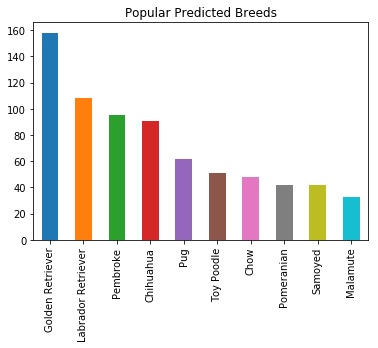

In [305]:
# Top 10 predectied breeds
twitter_archive_master[ twitter_archive_master['breed_pred'] != 'Not dog'].breed_pred.value_counts()[:10].plot(kind='bar',title='Popular Predicted Breeds')


In [306]:
#Extract month and the day of the week from date to use it for analysis
twitter_archive_master['month'] = twitter_archive_master['timestamp'].dt.month
twitter_archive_master['month_name'] = twitter_archive_master['timestamp'].dt.month_name()
twitter_archive_master['day_of_week'] = twitter_archive_master['timestamp'].dt.day_name()
twitter_archive_master['hour'] = twitter_archive_master['timestamp'].dt.hour

1     278
0     253
2     210
16    194
3     169
17    161
23    109
18    100
4      96
15     90
19     81
20     75
21     71
22     67
5      26
14      8
6       3
13      1
Name: hour, dtype: int64

### Day of week with high average in favourites and retweets

In [307]:
twitter_archive_master.groupby(['day_of_week'])['favorite_count','retweet_count'].mean().sort_values(by=['favorite_count','retweet_count'], ascending=False)


,favorite_count,retweet_count
day_of_week,,
Wednesday,9965.390572,3089.626263
Tuesday,9085.413559,2719.606780
Saturday,8977.011905,2967.952381
Sunday,8714.121569,2671.525490
Friday,8642.627660,2782.088652
Monday,8503.214067,2636.507645
Thursday,8339.214789,2525.964789


### Which month gets more likes and retweets?

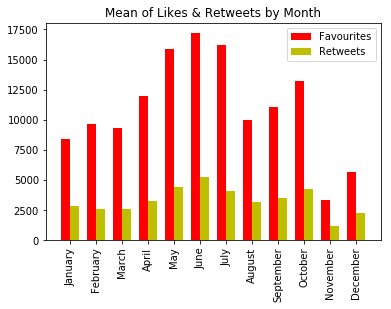

In [355]:
N = 12
fav = twitter_archive_master.groupby(['month'])['favorite_count'].mean()
ret = twitter_archive_master.groupby(['month'])['retweet_count'].mean()

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, fav, width, color='r')

p2 = ax.bar(ind + width, ret, width,
            color='y')

ax.set_title('Mean of Likes & Retweets by Month')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('January','February' ,'March','April',
         'May','June','July','August',
         'September','October','November','December'),rotation=90)

ax.legend((p1[0], p2[0]), ('Favourites', 'Retweets'))

ax.autoscale_view()
plt.xticks(rotation=90)
plt.show()

### Distribution of Tweets Over months by Likes & Retweets

Text(0.5,1,'Distribution of Tweets Over months by Favourites & Retweets')

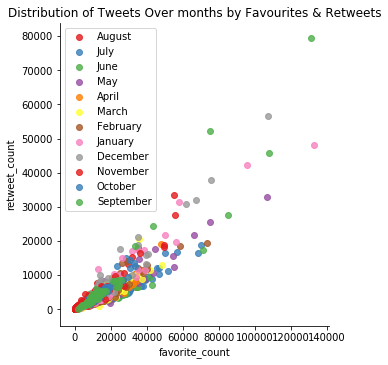

In [320]:

import seaborn as sns
df = sns.load_dataset('iris')
 
# Use the 'hue' argument to color
sns.lmplot( x="favorite_count", y="retweet_count", data=twitter_archive_master, fit_reg=False, hue='month_name', legend=False,palette="Set1")
 
plt.legend()

plt.title('Distribution of Tweets Over months by Likes & Retweets')




### Dog Stages Popularity

Text(0.5,1,'Dog Stages Popularity')

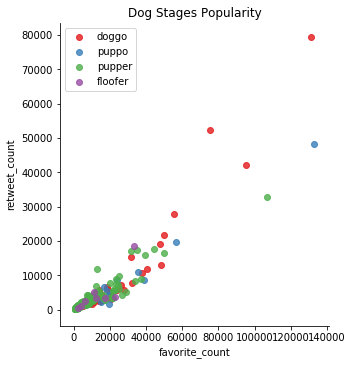

In [311]:

dog_stage_df=twitter_archive_master[~twitter_archive_master['dog_stage'].str.contains("None")]

# Use the 'hue' argument to color and gro[]
sns.lmplot( x="favorite_count", y="retweet_count", data=dog_stage_df, fit_reg=False, hue='dog_stage', legend=False,palette="Set1")
 
plt.legend()
 
plt.title("Dog Stages Popularity")


### What breed usually get higher rates?

In [348]:
twitter_archive_master['rate']=twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']
twitter_archive_master=twitter_archive_master[twitter_archive_master['breed_pred']!='Not dog']
df=twitter_archive_master.groupby(['breed_pred'])['rate','favorite_count','retweet_count'].mean().sort_values(by=['rate','favorite_count','retweet_count'], ascending=False)
df[:10]

,rate,favorite_count,retweet_count
breed_pred,,,
Clumber,2.700000,7320.000000,1885.000000
Bouvier Des Flandres,1.300000,18032.000000,4479.000000
Saluki,1.250000,24060.000000,5133.750000
Pomeranian,1.247619,7451.357143,2670.738095
Briard,1.233333,9511.666667,2966.666667
Tibetan Mastiff,1.225000,12173.500000,4193.000000
Border Terrier,1.214286,13578.000000,3377.142857
Silky Terrier,1.200000,7317.000000,1891.000000
Standard Schnauzer,1.200000,2046.000000,928.000000


### Most Retweeted and liked 

In [351]:
twitter_archive_master[twitter_archive_master['favorite_count']==twitter_archive_master['favorite_count'].max()]


,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,breed_pred,breed_conf,retweet_count,favorite_count,3,4,month,month_name,day_of_week,hour,rating,rate
308,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",13,10,,puppo,Lakeland Terrier,0.196015,48265.0,132810.0,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jan 21 18:26:02 +0000 2017,1,January,Saturday,18,1.3,1.3


In [352]:
twitter_archive_master[twitter_archive_master['retweet_count']==twitter_archive_master['retweet_count'].max()]


,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,breed_pred,breed_conf,retweet_count,favorite_count,3,4,month,month_name,day_of_week,hour,rating,rate
773,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",13,10,,doggo,Labrador Retriever,0.825333,79515.0,131075.0,"<a href=""http://twitter.com/download/iphone"" r...",Sat Jun 18 18:26:18 +0000 2016,6,June,Saturday,18,1.3,1.3
